In [12]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [13]:
# import dataset

df = pd.read_csv('../data-cleaning/dataset/combineddata.csv')

In [14]:
df.head()

,powder,salt,oil,edible,vegetable,wheat,flour,sugar,chilli,red,...,tocopheryl,triethanolamine,cl,titanium,dioxide,root,stearate,orange,honey,TYPE
0,1,1,1,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Test Ratio:  0.2


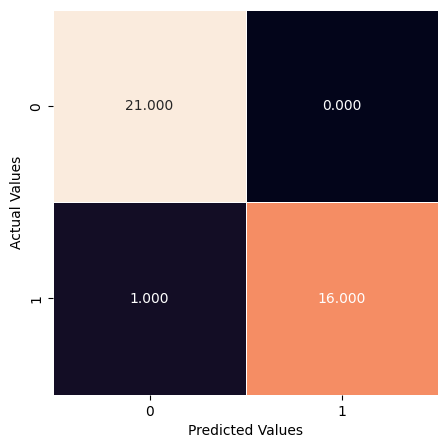

Test Ratio:  0.33


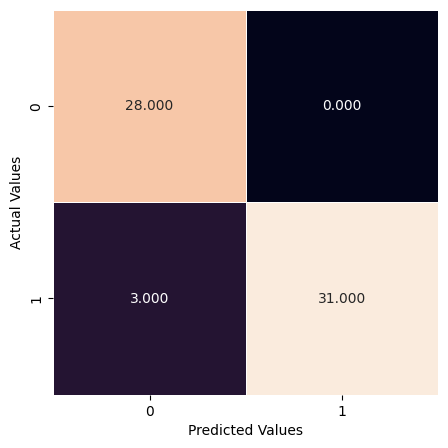

Test Ratio:  0.4


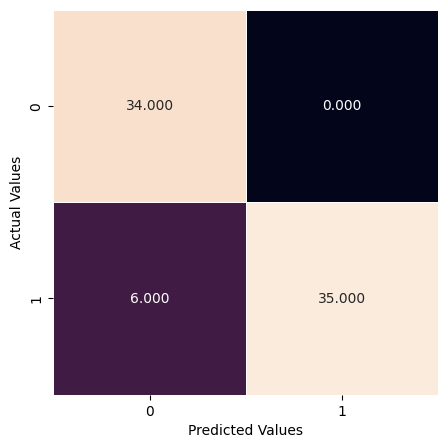

In [15]:
for i in [0.2, 0.33, 0.4]:
# for i in [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]:
    print("Test Ratio: ", i)
    X_train, X_test, y_train, y_test = train_test_split(df.drop('TYPE', axis=1), df['TYPE'], test_size=i, random_state=42)
    # Decision Tree

    lr = LogisticRegression()
    lr.fit(X_train, y_train)

    y_predicted = lr.predict(X_test)
    accuracy_score(y_test, y_predicted)*100
    y_predicted_train = lr.predict(X_train)
    accuracy_score(y_train, y_predicted_train)*100
    cm = confusion_matrix(y_test, y_predicted)
    cm
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='0.3f', linewidth=0.5, square=True, cbar=False)
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()


In [16]:
# Cross Validation Score

from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=lr, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: 97.27 %
Standard Deviation: 4.17 %
